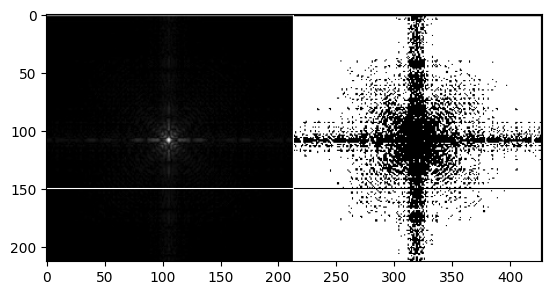

In [23]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
# Load the image in grayscale
img = cv2.imread('D:\\SLIIT\\4th_year\\2nd semester\\IUP\\LABS\\lab05\\log.jpg', 0)
# Calculate histogram
hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
# Calculate the Cumulative Distribution Function (CDF)
CDF = np.cumsum(hist1, axis=None, dtype=None, out=None) #no of gray levels
# Constants for histogram equalization
L = 65536
# Calculate total number of pixels
M, N = img.shape
total_pixels = M * N
# Normalize the CDF
cdf_normalized = (CDF - CDF.min()) * (L-1) / (total_pixels - 1)
# Apply histogram equalization
equalized = cv2.equalizeHist(img)
# Create a negative of the equalized image
equalized_neg = cv2.bitwise_not(equalized)
# Apply binary thresholding
_, binaryimg = cv2.threshold(equalized_neg, 100, 255, cv2.THRESH_BINARY)
# Stack original and binary images horizontally for comparison
result = np.hstack((img, binaryimg))
# Display the result
plt.imshow(result, cmap='gray')
plt.show()


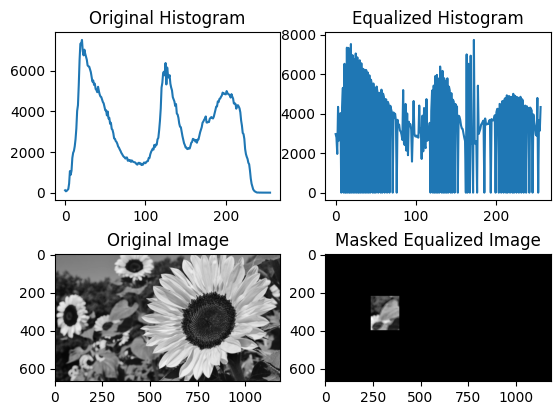

In [25]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
# Load the image in grayscale
img = cv.imread('D:\\SLIIT\\4th_year\\2nd semester\\IUP\\LABS\\lab01\\sunflower.jpg', 0)
# Compute the histogram
img_hist = cv.calcHist([img], [0], None, [256], [0, 256])
# Compute the Cumulative Distribution Function (CDF) and normalize it
cdf = np.cumsum(img_hist, axis=None, dtype=None, out=None)
cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255
cdf_normalized = cdf_normalized.astype('uint8')
# Map the original grayscale pixels through the normalized CDF
img2 = cdf_normalized[img]
# Apply histogram equalization
equalized_img = cv.equalizeHist(img2)
equalized_img2_hist = cv.calcHist([equalized_img], [0], None, [256], [0, 256])
# Plot the input and output histograms
plt.subplot(2, 2, 1)
plt.plot(img_hist)
plt.title('Original Histogram')
plt.subplot(2, 2, 2)
plt.plot(equalized_img2_hist)
plt.title('Equalized Histogram')
# Extract the image region of interest
mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[220:400, 240:390] = 255
masked_img = cv.bitwise_and(equalized_img, equalized_img, mask=mask)
# Display the input and output image
plt.subplot(2, 2, 3)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 4)
plt.imshow(masked_img, cmap='gray')
plt.title('Masked Equalized Image')
plt.show()


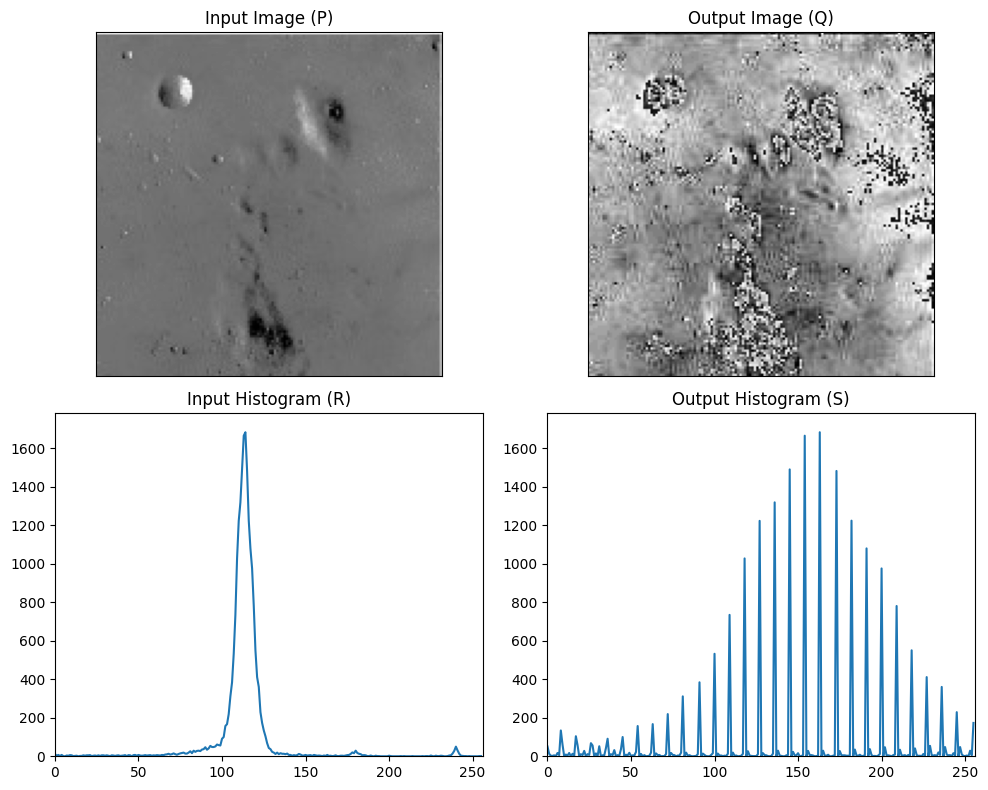

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# Load the image
inputImg = cv.imread('D:\\SLIIT\\4th_year\\2nd semester\\IUP\\LABS\\q\\image.png', cv.IMREAD_GRAYSCALE)
# If the image is not loaded, raise an error
if inputImg is None:
    raise ValueError("Image not loaded correctly")
# width and height of image
row, column = inputImg.shape
# Create an zeros array to store the output image
outputImg = np.zeros((row, column), dtype=np.uint8)
# Specify the mini, maxi, mino, maxo values
mini, maxi = np.percentile(inputImg, (5, 95))
mino, maxo = 0, 255
# Loop over the input image
for i in range(row):
    for j in range(column):
        # Compute contrast stretching
        outputImg[i, j] = (inputImg[i, j] - mini) * ((maxo - mino) / (maxi - mini)) + mino
# Compute the input and output histograms
hist_in, bins_in = np.histogram(inputImg.flatten(), 256, [0, 256])
hist_out, bins_out = np.histogram(outputImg.flatten(), 256, [0, 256])
# Display the input and output images
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(inputImg, cmap='gray')
plt.title('Input Image (P)')
plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2)
plt.imshow(outputImg, cmap='gray')
plt.title('Output Image (Q)')
plt.xticks([]), plt.yticks([])
# Display the input and output histograms
plt.subplot(2, 2, 3)
plt.plot(hist_in)
plt.title('Input Histogram (R)')
plt.xlim([0, 256])
plt.ylim([0, np.max(hist_in) + 100])
plt.subplot(2, 2, 4)
plt.plot(hist_out)
plt.title('Output Histogram (S)')
plt.xlim([0, 256])
plt.ylim([0, np.max(hist_out) + 100])
plt.tight_layout()
plt.show()
